In [1]:
# data manipulation 
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


## Dimensionality Reduction and Feature Space Exploration
##### By Ian Webster and Michael Amberg 

This program explores a small dataset and tries different methods of dimensionality reduction to minimize the features used for training while maintaining accuracy. Reducing the number of features used in a model reduces the chance of overfitting the data. Fewer features also helps to reduce the complexity of a machine learning model
### The Data
The dataset we are using is a csv file containing 15 features and whether or not the person was approved for a credit card. There are only 690 entries in the dataset, but it allows for a clear demonstration of the feature space

In [2]:
credit_db = pd.read_csv('clean_dataset.csv')

In [3]:
encoder = OrdinalEncoder() 

credit_db["Industry"] = encoder.fit_transform(credit_db[["Industry"]])
credit_db["Ethnicity"] = encoder.fit_transform(credit_db[["Ethnicity"]])
credit_db["Citizen"] = encoder.fit_transform(credit_db[["Citizen"]])
        

In [4]:
credit_db

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7.0,4.0,1.25,1,1,1,0,0.0,202,0,1
1,0,58.67,4.460,1,1,9.0,1.0,3.04,1,1,6,0,0.0,43,560,1
2,0,24.50,0.500,1,1,9.0,1.0,1.50,1,0,0,0,0.0,280,824,1
3,1,27.83,1.540,1,1,7.0,4.0,3.75,1,1,5,1,0.0,100,3,1
4,1,20.17,5.625,1,1,7.0,4.0,1.71,1,0,0,0,1.0,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,3.0,1.0,1.25,0,0,0,0,0.0,260,0,0
686,0,22.67,0.750,1,1,4.0,4.0,2.00,0,1,2,1,0.0,200,394,0
687,0,25.25,13.500,0,0,6.0,2.0,2.00,0,1,1,1,0.0,200,1,0
688,1,17.92,0.205,1,1,2.0,4.0,0.04,0,0,0,0,0.0,280,750,0


In [5]:
X, X_test, y, y_test = train_test_split(credit_db.iloc[:,0:-1], credit_db.iloc[:,-1], 
                                                    test_size=0.33, random_state=42)

### Basecase Prediction
For the base prediction of whether or not a person is approved for a credit card, we 

In [6]:
model = LogisticRegression(solver='liblinear')
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.861 (0.056)


In [7]:
model.fit(X,y)
RF_predictions = model.predict(X_test)
print("Accuracy of Logistic Regression: ", metrics.accuracy_score(y_test, RF_predictions))  # Computes exact accuracy

Accuracy of Logistic Regression:  0.8508771929824561


## Feature Selection


In [8]:
# Install a pip package in the current Jupyter kernel
# uncomment the things below if you need to install mlxtend
# import sys
# !{sys.executable} -m pip install mlxtend

In [9]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [10]:
FS_DB = pd.read_csv('clean_dataset.csv')

In [11]:
sfs = SFS(LinearRegression(),
          k_features=15,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [12]:
sfs.fit(X, y)
sfs.k_feature_names_ 

('Gender',
 'Age',
 'Debt',
 'Married',
 'BankCustomer',
 'Industry',
 'Ethnicity',
 'YearsEmployed',
 'PriorDefault',
 'Employed',
 'CreditScore',
 'DriversLicense',
 'Citizen',
 'ZipCode',
 'Income')

C:\Users\ianwe\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ianwe\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


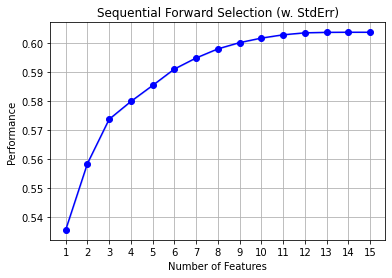

In [13]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

As we can see, the performance only has a slight reduction as a the first few features are removed. From this we can select that the optimal number of features vs perfomance would be between 8 - 11. I will select the top 9 features to see how it compares to the original 

In [14]:
sfs2 = SFS(LinearRegression(),
          k_features=9,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs2.fit(X, y)
sfs2.k_feature_names_ 


('Married',
 'BankCustomer',
 'Industry',
 'YearsEmployed',
 'PriorDefault',
 'Employed',
 'CreditScore',
 'Citizen',
 'Income')

In [15]:
# the top colums to use for classification 
FS_x_copy = X[['Married',
 'BankCustomer',
 'Industry',
 'YearsEmployed',
 'PriorDefault',
 'Employed',
 'CreditScore',
 'Citizen',
 'Income']]

FS_xtest_copy = X_test[['Married',
 'BankCustomer',
 'Industry',
 'YearsEmployed',
 'PriorDefault',
 'Employed',
 'CreditScore',
 'Citizen',
 'Income']]

In [16]:
FS_x_copy

,Married,BankCustomer,Industry,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income
382,0,0,1.0,4.500,0,0,0,0.0,456
137,1,1,0.0,4.250,1,1,6,0.0,0
346,1,1,4.0,0.250,0,0,0,0.0,122
326,0,0,4.0,0.040,0,0,0,0.0,179
33,1,1,3.0,5.000,1,0,0,0.0,4000
...,...,...,...,...,...,...,...,...,...
71,1,1,10.0,12.500,1,0,0,0.0,0
106,1,1,5.0,0.500,1,0,0,1.0,0
270,1,1,4.0,0.000,0,0,0,2.0,0
435,0,0,6.0,0.000,0,1,4,0.0,1


In [17]:
model = LogisticRegression(solver='liblinear')
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, FS_x_copy, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.869 (0.049)


In [18]:
model.fit(FS_x_copy,y)
RF_predictions = model.predict(FS_xtest_copy)
print("Accuracy of Logistic Regression: ", metrics.accuracy_score(y_test, RF_predictions)) 

Accuracy of Logistic Regression:  0.8377192982456141


### Principal Component Analysis (PCA)
Principal Component Analysis is the process of computing the principle components of a dataset, and using a specified amount of them to preform a change of basis on the data, ignoring the rest. By projecting each data point onto the specified components it achieves a lower-dimentional dataframe for the actual data itself.


In [19]:
n_score_mean = []
n_score_std = []

pcd_db = credit_db

def pca_eval(target):
    steps = [('pca', PCA(n_components=target)), ('m', LogisticRegression())]
    model = Pipeline(steps=steps)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    n_score_mean.append(mean(n_scores))
    n_score_std.append(std(n_scores))


for i in range(1,16):
    pca_eval(i)


In [37]:
i = 14
print('Inital Number of Components = 15')
print('Num Removed\t:\tAccuracy Mean (STD)')
for score in n_score_mean:
    print('\t%.0f\t: \t%.3f (%.3f)' % (15-(i), n_score_mean[i], n_score_std[i]))
    i = i-1


Inital Number of Components = 15
Num Removed	:	Accuracy Mean (STD)
	1	: 	0.842 (0.059)
	2	: 	0.850 (0.049)
	3	: 	0.846 (0.058)
	4	: 	0.837 (0.052)
	5	: 	0.811 (0.043)
	6	: 	0.801 (0.049)
	7	: 	0.792 (0.052)
	8	: 	0.781 (0.056)
	9	: 	0.779 (0.054)
	10	: 	0.768 (0.057)
	11	: 	0.769 (0.061)
	12	: 	0.750 (0.064)
	13	: 	0.670 (0.064)
	14	: 	0.668 (0.057)
	15	: 	0.664 (0.059)


Interestingly enough, at the time of our experimentations, removing one leads to a 84.2% accuracy, removing two leads to 85.0%, and removing three leads to a 84.6%.

With this information it is save to infer that by removing two components from the dataframe, PCA manages to increase the accuracy of the linear regression model between the components and the target value (i.e. the customer date vs the credit card acceptance).
